In [1]:
from pyspark import SparkContext,SparkConf
sconf = SparkConf().setMaster("yarn").setAppName("employees_data")
sc= SparkContext(conf=sconf)
sc

<SparkContext master=yarn appName=employees_data>

In [2]:
import sys,os

os.environ["SPARK_HOME"] = '/opt/cloudera/parcels/CDH/lib/spark'

sys.path.append('/opt/cloudera/parcels/CDH/lib/spark/python')

sys.path.append('/opt/cloudera/parcels/CDH/lib/spark/python/lib/py4j-0.9-src.zip')

import pyspark

import findspark

findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
spark = SparkSession.builder.appName("employees_data").config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083").enableHiveSupport().getOrCreate()
spark

In [3]:
from pyspark.sql import SQLContext,Row

In [12]:
employees = spark.sql("select * from employee_db.employees")

In [13]:
departments = spark.sql("select * from employee_db.departments")

In [14]:
dept_emp = spark.sql("select * from employee_db.dept_emp")

In [15]:
dept_managers = spark.sql("select * from employee_db.dept_managers")

In [16]:
titles = spark.sql("select * from employee_db.titles")

In [17]:
salaries = spark.sql("select * from employee_db.salaries")

In [19]:
employees.createOrReplaceTempView("employees")
departments.createOrReplaceTempView("departments")
dept_emp.createOrReplaceTempView("dept_emp")
titles.createOrReplaceTempView("titles")
salaries.createOrReplaceTempView("salaries")
dept_managers.createOrReplaceTempView("dept_managers")

In [20]:
df = spark.sql("""select e.*,d.dept_no,d.dept_name,t.title_id,t.title,s.salary from employees e 
               join titles t on e.emp_titles_id = t.title_id
               join dept_emp de on e.emp_no = de.emp_no
               join departments d on d.dept_no = de.dept_no
               join salaries s on e.emp_no = s.emp_no
               """)

In [21]:
df.show(5)

+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+-------+-----------------+--------+---------------+------+
|emp_no|emp_titles_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_rating|left_organisation| last_date|dept_no|        dept_name|title_id|          title|salary|
+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+-------+-----------------+--------+---------------+------+
|   d005|    "development"|   e0003|Senior Engineer| 60117|
|   d007|          "Sales"|   s0001|          Staff| 65828|
|   d004|     "Production"|   e0003|Senior Engineer| 40006|
|   d004|     "Production"|   e0003|Senior Engineer| 40054|
|   d003|"Human Resources"|   s0001|          Staff| 78228|
+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+----

In [14]:
df.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- emp_titles_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_rating: string (nullable = true)
 |-- left_organisation: boolean (nullable = true)
 |-- last_date: string (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- salary: integer (nullable = true)



In [15]:
df.count()

331603

In [16]:
df.summary().show()

+-------+------------------+-------------+----------+----------+---------+------+---------+------------------+-----------------------+---------+-------+------------------+--------+------------------+-----------------+
|summary|            emp_no|emp_titles_id|birth_date|first_name|last_name|   sex|hire_date|    no_of_projects|last_performance_rating|last_date|dept_no|         dept_name|title_id|             title|           salary|
+-------+------------------+-------------+----------+----------+---------+------+---------+------------------+-----------------------+---------+-------+------------------+--------+------------------+-----------------+
|  count|            331603|       331603|    331603|    331603|   331603|331603|   331603|            331603|                 331603|   331603| 331603|            331603|  331603|            331603|           331603|
|   mean|253332.60502468314|         null|      null|      null|     null|  null|     null|5.5048567111877755|                  

# Exploring the data

In [17]:
df = df.withColumn("left_organisation",df.left_organisation.cast("int"))

In [18]:
df.select(['left_organisation']).show(10)

+-----------------+
|left_organisation|
+-----------------+
|                1|
|                0|
|                0|
|                0|
|                0|
|                0|
|                1|
|                0|
|                0|
|                0|
+-----------------+
only showing top 10 rows



In [19]:
df_pd = df.toPandas()

In [20]:
df_pd.isna().sum()

emp_no                     0
emp_titles_id              0
birth_date                 0
first_name                 0
last_name                  0
sex                        0
hire_date                  0
no_of_projects             0
last_performance_rating    0
left_organisation          0
last_date                  0
dept_no                    0
dept_name                  0
title_id                   0
title                      0
salary                     0
dtype: int64

In [21]:
#Visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

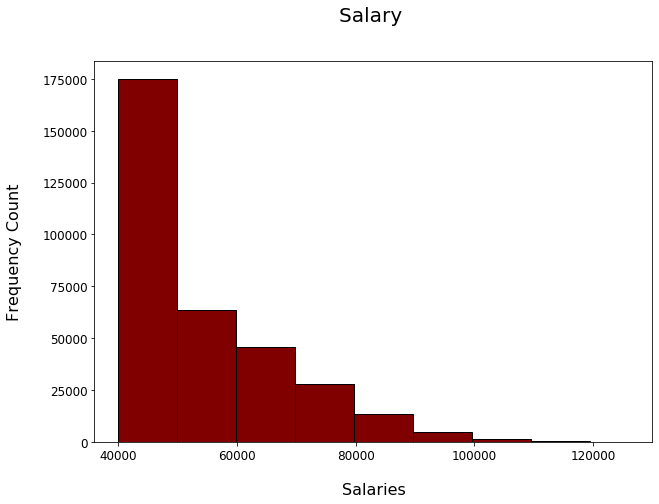

In [22]:
plt.rcParams['figure.figsize']=(10,7)
plt.hist(df_pd['salary'],bins=9,color='maroon',alpha=1,edgecolor='black')
plt.title('Salary ',fontsize=20,pad=40)
plt.xlabel('Salaries',fontsize=16,color='black',labelpad=20)
plt.ylabel('Frequency Count',fontsize=16,color='black',labelpad=20)
plt.xlim(36000,130000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

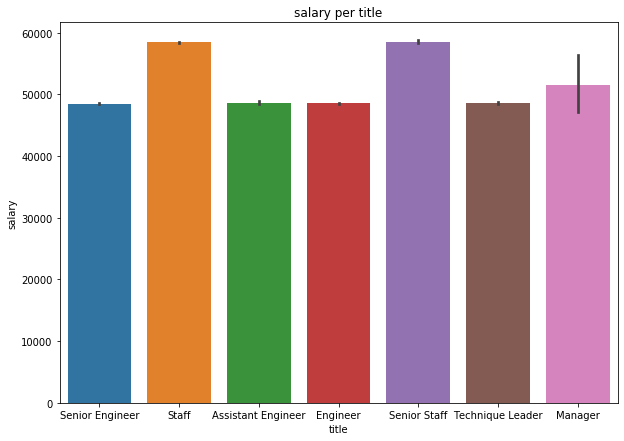

In [23]:
plt.figure(figsize=(10,7))
sns.barplot(data=df_pd,x='title',y='salary')
plt.xlabel('title')
plt.ylabel('salary')
plt.title('salary per title')
plt.show()

Exception ignored in: <function JavaWrapper.__del__ at 0x7fdad9ebe290>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/pyspark/ml/wrapper.py", line 40, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
AttributeError: 'OneHotEncoder' object has no attribute '_java_obj'


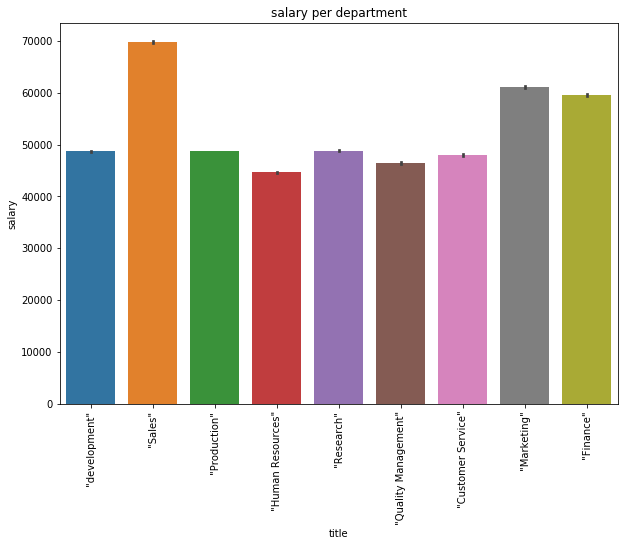

In [45]:
plt.figure(figsize=(10,7))
sns.barplot(data=df_pd,x='dept_name',y='salary')
plt.xlabel('title')
plt.ylabel('salary')
plt.title('salary per department')
plt.xticks(rotation = 90)
plt.show()

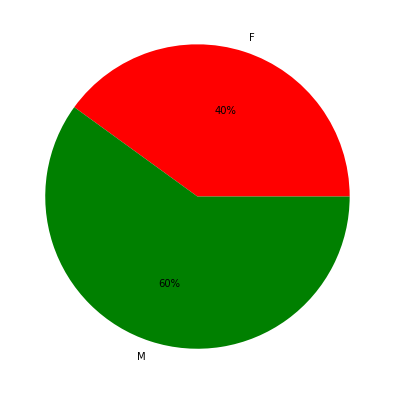

In [54]:
gender_salary = df_pd.groupby('sex')['salary'].sum()

plt.pie(gender_salary,labels= ['F','M'],autopct="%1.0f%%", colors = ['r','g'])


plt.show()

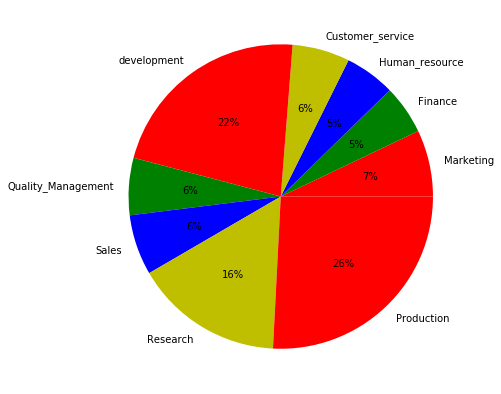

In [56]:
dept_project = df_pd.groupby('dept_name')['no_of_projects'].sum()

plt.pie(dept_project,labels =['Marketing','Finance','Human_resource','Customer_service','development','Quality_Management','Sales','Research','Production'],autopct="%1.0f%%", colors = ['r','g','b','y'])


plt.show()

# data prep

In [22]:
df1 = df

In [23]:
#Columns that will be used as features and their types
continuous_features = ['salary','no_of_projects']
                    
categorical_features = ['dept_name', 'dept_no','title']

In [24]:
#Encoding all categorical features
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler, PolynomialExpansion, VectorIndexer

In [25]:
#create object of StringIndexer class and specify input and output column
SI_dept_no = StringIndexer(inputCol='dept_no', outputCol='dept_no_Index')
SI_dept_name = StringIndexer(inputCol='dept_name', outputCol='dept_name_Index')
SI_title = StringIndexer(inputCol='title', outputCol='title_Index')

In [26]:
# transform the data
df1 = SI_dept_no.fit(df1).transform(df1)
df1 = SI_dept_name.fit(df1).transform(df1)
df1 = SI_title.fit(df1).transform(df1)

In [65]:
# veiw the transformed data
df1.select(['dept_no','dept_name','title','dept_no_Index','dept_name_Index','title_Index']).show(10)

+-------+--------------------+------------------+-------------+---------------+-----------+
|dept_no|           dept_name|             title|dept_no_Index|dept_name_Index|title_Index|
+-------+--------------------+------------------+-------------+---------------+-----------+
|   d005|       "development"|   Senior Engineer|          0.0|            0.0|        1.0|
|   d007|             "Sales"|             Staff|          2.0|            2.0|        0.0|
|   d004|        "Production"|   Senior Engineer|          1.0|            1.0|        1.0|
|   d004|        "Production"|   Senior Engineer|          1.0|            1.0|        1.0|
|   d003|   "Human Resources"|             Staff|          7.0|            7.0|        0.0|
|   d005|       "development"|   Senior Engineer|          0.0|            0.0|        1.0|
|   d008|          "Research"|             Staff|          4.0|            4.0|        0.0|
|   d005|       "development"|Assistant Engineer|          0.0|            0.0| 

In [27]:
#create object and specify input and output column
OHE = OneHotEncoderEstimator(inputCols=['dept_name_Index', 'dept_no_Index','title_Index'],outputCols=['dept_name_Vec', 'dept_no_Vec','title_Vec'])


In [28]:
df1 = OHE.fit(df1).transform(df1)

In [70]:
df1.select(['dept_no_Index','dept_name_Index','title_Index','dept_name_Vec', 'dept_no_Vec','title_Vec']).show(10)

+-------------+---------------+-----------+-------------+-------------+-------------+
|dept_no_Index|dept_name_Index|title_Index|dept_name_Vec|  dept_no_Vec|    title_Vec|
+-------------+---------------+-----------+-------------+-------------+-------------+
|          0.0|            0.0|        1.0|(8,[0],[1.0])|(8,[0],[1.0])|(6,[1],[1.0])|
|          2.0|            2.0|        0.0|(8,[2],[1.0])|(8,[2],[1.0])|(6,[0],[1.0])|
|          1.0|            1.0|        1.0|(8,[1],[1.0])|(8,[1],[1.0])|(6,[1],[1.0])|
|          1.0|            1.0|        1.0|(8,[1],[1.0])|(8,[1],[1.0])|(6,[1],[1.0])|
|          7.0|            7.0|        0.0|(8,[7],[1.0])|(8,[7],[1.0])|(6,[0],[1.0])|
|          0.0|            0.0|        1.0|(8,[0],[1.0])|(8,[0],[1.0])|(6,[1],[1.0])|
|          4.0|            4.0|        0.0|(8,[4],[1.0])|(8,[4],[1.0])|(6,[0],[1.0])|
|          0.0|            0.0|        5.0|(8,[0],[1.0])|(8,[0],[1.0])|(6,[5],[1.0])|
|          6.0|            6.0|        1.0|(8,[6],[1.0

In [29]:
featureCols = continuous_features + ['dept_name_Vec', 'dept_no_Vec','title_Vec'] 

# Assembler

In [30]:
assembler = VectorAssembler( inputCols = featureCols, outputCol = "features")

In [31]:
df_train = assembler.transform( df1)

In [32]:
df_train = df_train.withColumn('label', df_train['left_organisation'].cast('integer'))

In [33]:
#Split the dataset
train_df, test_df = df_train.randomSplit( [0.7, 0.3], seed = 53 )

In [83]:
train_df.show(5)

+------+-------------+----------+----------+---------+---+---------+--------------+-----------------------+-----------------+----------+-------+--------------------+--------+---------------+------+-------------+---------------+-----------+-------------+-------------+-------------+--------------------+-----+
|emp_no|emp_titles_id|birth_date|first_name|last_name|sex|hire_date|no_of_projects|last_performance_rating|left_organisation| last_date|dept_no|           dept_name|title_id|          title|salary|dept_no_Index|dept_name_Index|title_Index|dept_name_Vec|  dept_no_Vec|    title_Vec|            features|label|
+------+-------------+----------+----------+---------+---+---------+--------------+-----------------------+-----------------+----------+-------+--------------------+--------+---------------+------+-------------+---------------+-----------+-------------+-------------+-------------+--------------------+-----+
|   d005|       "development"|   e0003|Senior Engineer| 60117|          0

In [84]:
test_df.show(5)

+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+-------+-------------+--------+------------------+------+-------------+---------------+-----------+-------------+-------------+-------------+--------------------+-----+
|emp_no|emp_titles_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_rating|left_organisation| last_date|dept_no|    dept_name|title_id|             title|salary|dept_no_Index|dept_name_Index|title_Index|dept_name_Vec|  dept_no_Vec|    title_Vec|            features|label|
+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+-------+-------------+--------+------------------+------+-------------+---------------+-----------+-------------+-------------+-------------+--------------------+-----+
|   d007|      "Sales"|   s0001|             Staff| 65828|          2.0|          

In [85]:
train_df.count()

232080

In [86]:
test_df.count()

99523

In [34]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

In [35]:
logreg = LogisticRegression()

In [ ]:
lm = logreg.fit( train_df )

In [81]:
#Make predictions on train data and evaluate
y_pred_train = lm.transform(train_df)

In [82]:
y_pred_test = lm.transform( test_df )

In [90]:
y_pred_train.select( 'features',  'label', 'prediction', 'left_organisation').show(5)

+--------------------+-----+----------+-----------------+
|            features|label|prediction|left_organisation|
+--------------------+-----+----------+-----------------+
|(24,[0,1,2,10,19]...|    1|       0.0|             true|
|(24,[0,1,3,11,19]...|    0|       0.0|            false|
|(24,[0,1,3,11,19]...|    0|       0.0|            false|
|(24,[0,1,9,17,18]...|    0|       0.0|            false|
|(24,[0,1,8,16,19]...|    0|       0.0|            false|
+--------------------+-----+----------+-----------------+
only showing top 5 rows



In [94]:
lm.intercept

-2.1982377292382327

In [98]:
summary = lm.summary
summary.accuracy

0.9003921061702861

In [100]:
summary.areaUnderROC

0.5079540085134115

In [105]:
print('Area under ROC or train dataset',summary.areaUnderROC)
print('Area under ROC or test dataset',BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="rawPrediction", metricName="areaUnderROC").evaluate(y_pred_test))

Area under ROC or train dataset 0.5079540085134115
Area under ROC or test dataset 0.504885272172025


In [91]:
y_pred_test.select( 'features',  'label', 'prediction', 'left_organisation').show(5)

+--------------------+-----+----------+-----------------+
|            features|label|prediction|left_organisation|
+--------------------+-----+----------+-----------------+
|(24,[0,1,4,12,18]...|    0|       0.0|            false|
|(24,[0,1,2,10,19]...|    0|       0.0|            false|
|(24,[0,1,6,14,18]...|    1|       0.0|             true|
|(24,[0,1,2,10,23]...|    0|       0.0|            false|
|(24,[0,1,3,11,20]...|    0|       0.0|            false|
+--------------------+-----+----------+-----------------+
only showing top 5 rows



In [124]:
## Random Forest Classifier
from pyspark.ml.classification import RandomForestClassifier
rfm = RandomForestClassifier(featuresCol="features",
                              labelCol="label",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')
rfm1 = rfm.fit( train_df )

In [125]:
pred = rfm.transform(test_df)
pred.show(5)

+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+-------+-------------+--------+------------------+------+-------------+---------------+-----------+-------------+-------------+-------------+--------------------+-----+--------------------+--------------------+----------+
|emp_no|emp_titles_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_rating|left_organisation| last_date|dept_no|    dept_name|title_id|             title|salary|dept_no_Index|dept_name_Index|title_Index|dept_name_Vec|  dept_no_Vec|    title_Vec|            features|label|       rawPrediction|         probability|prediction|
+------+-------------+----------+----------+---------+---+----------+--------------+-----------------------+-----------------+----------+-------+-------------+--------+------------------+------+-------------+---------------+-----------+-------------+-------------+-------------+----

In [126]:
def train(train, test, classifier):
  # (train, test) = df.randomSplit([.7,.3])
  print(classifier)
  model = classifier.fit(train)

  pred = model.transform(test)

  eval_accuracy = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="accuracy"))
  
  eval_precision = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedPrecision"))
  
  eval_recall = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="weightedRecall"))
  
  eval_f1 = (MulticlassClassificationEvaluator
        (labelCol="label", predictionCol="prediction", metricName="f1"))

  accuracy = eval_accuracy.evaluate(pred)

  precision =  eval_precision.evaluate(pred)

  recall =  eval_recall.evaluate(pred)

  f1 =  eval_f1.evaluate(pred)

  print(f"""
  Accuracy  = {accuracy}
  Error     = {1-accuracy}
  Precision = {precision}
  Recall    = {recall}
  F1        = {f1}""")

  return model, pred

In [127]:
rfm2 = RandomForestClassifier(featuresCol="features",
                              labelCol="label",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')
_ , pred2 = train(train_df, test_df, rfm2)

pred2.select("prediction", "label", "features").show()

RandomForestClassifier_225a78db3549

  Accuracy  = 0.9004853149523225
  Error     = 0.09951468504767746
  Precision = 0.8108738024447836
  Recall    = 0.9004853149523225
  F1        = 0.853333404962538
+----------+-----+--------------------+
|prediction|label|            features|
+----------+-----+--------------------+
|       0.0|    0|(24,[0,1,4,12,18]...|
|       0.0|    0|(24,[0,1,2,10,19]...|
|       0.0|    1|(24,[0,1,6,14,18]...|
|       0.0|    0|(24,[0,1,2,10,23]...|
|       0.0|    0|(24,[0,1,3,11,20]...|
|       0.0|    0|(24,[0,1,5,13,18]...|
|       0.0|    0|(24,[0,1,9,17,21]...|
|       0.0|    0|(24,[0,1,4,12,18]...|
|       0.0|    0|(24,[0,1,2,10,19]...|
|       0.0|    0|(24,[0,1,3,11,20]...|
|       0.0|    0|(24,[0,1,2,10,20]...|
|       0.0|    0|(24,[0,1,2,10,22]...|
|       0.0|    0|(24,[0,1,2,10,19]...|
|       0.0|    0|(24,[0,1,3,11,19]...|
|       0.0|    0|(24,[0,1,3,11,20]...|
|       0.0|    0|(24,[0,1,2,10,20]...|
|       0.0|    0|(24,[0,1,5,13,18]...

# Creating Pipeline

In [129]:
continuous_features

['salary', 'no_of_projects']

In [130]:
categorical_features

['dept_name', 'dept_no', 'title']

In [155]:
input_col = ['dept_name', 'dept_no', 'title']
index_col = ['dept_name_Index','dept_no_Index','title_Index']
vec_col = ['dept_name_Vec', 'dept_no_Vec','title_Vec']

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator

## Create indexers for the categorical features
indexers = StringIndexer(inputCol=input_col, outputCol=index_col)
                          
## encode the categorical features
encoders = OneHotEncoderEstimator(inputCols=index_col,outputCols=vec_col)
                         
# Vector Assembler
assembler = VectorAssembler(inputCols= featureCols, outputCol = "features")

# ML Model
rfm = RandomForestClassifier(featuresCol="features",
                              labelCol="label",
                              numTrees=50,
                              maxDepth=5,
                              featureSubsetStrategy='onethird')

# Creating Pipeline
pipeline = Pipeline( stages= [indexer, assembler, rfm])

In [157]:
#Train Test Split
training,testing = df_train.randomSplit([0.7,0.3],seed=53)

In [ ]:
model = pipeline.fit(training)

In [ ]:
y_pred_train = model.transform(training)

In [ ]:
y_pred_test = model.transform(testing)